In [28]:
# こちらの方のほぼコピペ、３山にしただけ
# https://qiita.com/ogi-iii/items/eb9280ab489e25edf6c9

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=2, suppress = True)

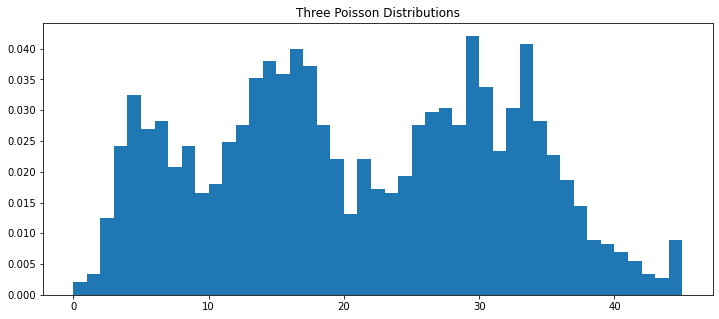

In [30]:
lambda_A = 5
lambda_B = 15
lambda_C = 30

num_A = 250
num_B = 500
num_C = 700

A = np.random.poisson(lambda_A, num_A)
B = np.random.poisson(lambda_B, num_B)
C = np.random.poisson(lambda_C, num_C)

X = np.concatenate([A, B, C])

plt.figure(figsize=(12, 5))
plt.title('Three Poisson Distributions')
plt.hist(X, bins = 45, density = True)
plt.show()

In [31]:
def log_sum_exp(X):
    max_x = np.max(X, axis=1).reshape(-1, 1)
    return np.log(np.sum(np.exp(X - max_x), axis=1).reshape(-1, 1)) + max_x

In [32]:
sample_s = []
sample_lambda = []
sample_pi = []

MAXITER = 100
N = len(X)
K = 3

# initial values
init_Gam_param_a = 1
init_Gam_param_b = 1
init_Dir_alpha = np.ones(K)

Lambda = np.array([1.0, 1.0, 1.0])
Pi = np.array([1/K, 1/K, 1/K])

In [33]:
for i in range(MAXITER):

    s = np.zeros((N, K))

    log_eta = np.dot(X.reshape(N, 1), np.log(Lambda.reshape(1, K))) - Lambda.reshape(1, K) + np.log(Pi.reshape(1, K))

    logsumexp_eta = -1 * log_sum_exp(log_eta)
    eta = np.exp(log_eta + logsumexp_eta)

    for n in range(N):
        s[n] = np.random.multinomial(1, eta[n])   
    sample_s.append(np.copy(s))

    Gam_param_a = (np.dot(s.T, X.reshape(N, 1)) + init_Gam_param_a).T[0]
    Gam_param_b = np.sum(s, axis=0).T + init_Gam_param_b

    Lambda = np.random.gamma(Gam_param_a, 1/Gam_param_b)
    sample_lambda.append(np.copy(Lambda))

    Dir_alpha = np.sum(s, axis=0) + init_Dir_alpha

    Pi = np.random.dirichlet(Dir_alpha)
    sample_pi.append(np.copy(Pi))

In [34]:
sample_s_ndarray = np.array(sample_s)
sample_lambda_ndarray = np.array(sample_lambda)
sample_pi_ndarray = np.array(sample_pi)

In [35]:
# 各クラスタの平均値
lambda_avg = list(np.average(sample_lambda_ndarray, axis=0))
lambda_avg.sort()

print("estimated lambda:", lambda_avg)
print('true lambda', [lambda_A, lambda_B, lambda_C])

estimated lambda: [5.685829322223956, 15.215499364245172, 30.205638671878333]
true lambda [5, 15, 30]


In [36]:
split_ratio = list(np.average(sample_pi_ndarray, axis=0))
split_ratio.sort()

print("estimated split:", split_ratio)
print("true split: ", [num_A/(num_A + num_B + num_C), num_B/(num_A + num_B + num_C), num_C/(num_A + num_B + num_C)])

estimated split: [0.18374848285411122, 0.3512097975807539, 0.46504171956513524]
true split:  [0.1724137931034483, 0.3448275862068966, 0.4827586206896552]
